In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# PARAMETERS
# -----------------------------
# Number of spatial points
N = 1024

# Spatial domain: x in [-Xmax, Xmax]
Xmax = 10.0

# Time step
dt = 0.001

# Number of time steps
N_steps = 2000

# Define the coordinate space
x = np.linspace(-Xmax, Xmax, N, endpoint=False)  # length N
dx = x[1] - x[0]

# Frequency (wavenumber) space for FFT
# The factor 2π is handled implicitly in the definition,
# so we can define k accordingly for the discrete Fourier transform.
k = 2.0 * np.pi * np.fft.fftfreq(N, d=dx)


In [8]:
# Example 1: Harmonic potential
# V = 0.5 * omega^2 * x^2. Here let's pick omega = 1 for simplicity.
V = 0.5 * x**2  

# Alternatively, for a Gaussian barrier, you might do:
# V0 = 10.0
# a = 1.0  # width parameter
# V = V0 * np.exp(-x**2 / (2 * a**2))


In [9]:
# Wavefunction parameters
x0 = -3.0        # Initial center
p0 = 5.0         # Initial momentum
sigma = 0.5      # Width of the Gaussian

psi = np.exp(-0.5 * ((x - x0)/sigma)**2) * np.exp(1j * p0 * (x - x0))
# Normalize the wavefunction
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)


In [10]:
# Potential half-step factor
expV_half = np.exp(-0.5j * V * dt)

# Kinetic full-step factor
# Kinetic operator T = -(1/2) d^2/dx^2 => in momentum space => E(k) = k^2 / 2
expK = np.exp(-0.5j * (k**2) * dt)


In [14]:
# Lists to store data for plotting, if desired
psi_data = []
time_data = []

for step in range(N_steps):
    # Record wavefunction and time
    if step % 200 == 0:
        psi_data.append(psi.copy())
        time_data.append(step * dt)
    
    # 1) Half-step potential
    psi *= expV_half
    
    # 2) Full-step kinetic in momentum space
    # Forward FFT
    psi_k = np.fft.fft(psi)
    # Multiply by kinetic factor
    psi_k *= expK
    # Inverse FFT
    psi = np.fft.ifft(psi_k)
    
    # 3) Half-step potential
    psi *= expV_half

# After the loop, psi is your wavefunction at t = N_steps * dt.


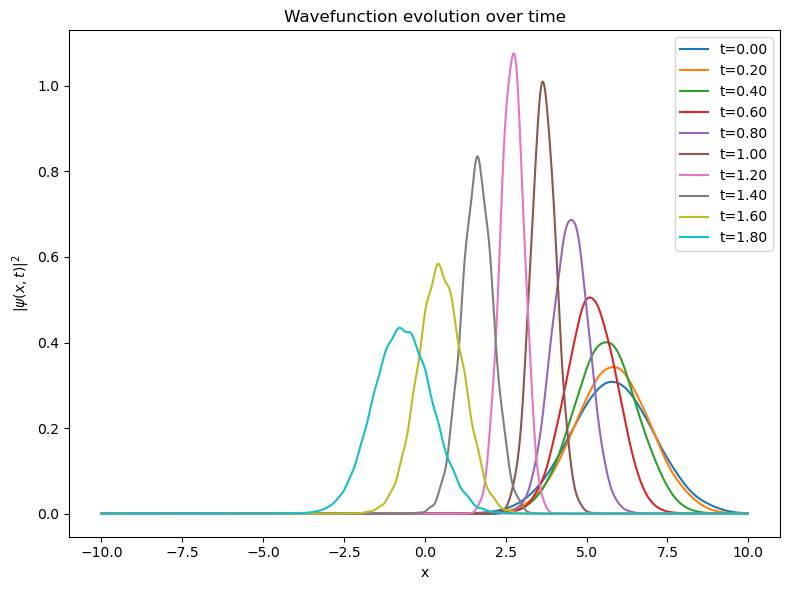

In [15]:
# Plot results at different snapshots in time
plt.figure(figsize=(8, 6))

for i, (t, psi_snap) in enumerate(zip(time_data, psi_data)):
    plt.plot(x, np.abs(psi_snap)**2, label=f"t={t:.2f}")

# plt.plot(x, V, 'k--', alpha=0.7, label="Potential V(x)")
plt.xlabel('x')
plt.ylabel('$|\psi(x,t)|^2$')
plt.legend()
plt.title('Wavefunction evolution over time')
plt.tight_layout()
plt.show()
